TestSuit Number:927442	
Test Case	TSR FunctionBasicDetection check
Description / Execution Steps
1. a) Accelerate the host vehicle, V_ego = 20 kph.
    b) Stabilise and maintain V_ego = 20 kph.
2. a) Place a 20 kph Speed limit Traffic sign along the EGO lane direction, to the right side.
3. a) The final V_ego must be reached atleast before a minimum distance of 100 meters is achieved between EGO vehicle and Traffic Sign post.
    b) Only after 1(b), 2(a), 3(a) are well established, the EGO vehicle should approach the Traffic Sign.
4. EGO vehicle crosses the 20 kph Speed limit Traffic Sign post at a speed of a constant speed of 20 kph."	"Pass/Fail Criteria:
Passed:
After Point 1:
        • TSSDetectedStatus = 0, before the Traffic Sign.

After Point 4:
       • TSSDetectedStatus = 1, after crossing Traffic Sign.
       • TSSCurrentRegion = XX


Failed:
If
       • TSSDetectedStatus = 0, after crossing Traffic Sign.
       (i.e.  after EGO has crossed/went passed-by Traffic Sign post.)
                                   OR
       • TSSDetectedStatus = 1, before approaching the Traffic Sign."	

Default imports for tetscase

In [73]:
import numpy as np
import os
from measproc.IntervalList import maskToIntervals

Imports for visualizations

In [74]:
from PySide import QtGui, QtCore
from IPython.display import Image
import datavis
from datavis import PlotNavigator
from datavis import TrackNavigator


Importing DataProvider for Test suit: 4926652

In [75]:
from testevalutils.data_provider import DataProvider

Defining Ground Truth timestamp where TrafficSign crossed

In [76]:
TRAFFICSIGNGROUNDTRUTHTIMESTAMP = 1644330223.55

collecting TestSuit resources path 

In [77]:
currentTestSuitResourcePath =  os.path.abspath(os.path.join(os.path.curdir,"resources"))
print(currentTestSuitResourcePath)

C:\KBApps\PythonToolchain_git\dataevalaebs\src\testeval\suit_4926652\resources


Creating DataProvider by providing measurement

In [78]:
dataProvider = DataProvider(r"D:\measurements\TSR_evaluation\tssdetected_status\mi5id787__2022-02-08_14-17-40.h5",currentTestSuitResourcePath )

Show available signals for test suit 4926652 from DataProvider
alias:(deviceName,SignalName) format is used

In [79]:
dataProvider.showPreDefinedSignals()

commonTimeGroup :
commonTime : ('EEC1_00_s00', 'EngineSpeed')
commonTime : ('EEC1_00_s00', 'EEC1_EngSpd_00')
tssGroup :
TSSCurrentRegion : ('FLC_PROP1_sE8', 'TSSCurrentRegion')
TSSLifeTime : ('FLC_PROP1_sE8', 'TSSLifeTime')
TSSDetectedUoM : ('FLC_PROP1_sE8', 'TSSDetectedUoM')
TSSDetectedStatus : ('FLC_PROP1_sE8', 'TSSDetectedStatus')
TSSOverspeedAlert : ('FLC_PROP1_sE8', 'TSSOverspeedAlert')
TSSDetectedValue : ('FLC_PROP1_sE8', 'TSSDetectedValue')
TSSCurrentRegion : ('FLC_PROP1_E8_sE8', 'FLCProp1_TSSCurrentRegion_E8')
TSSLifeTime : ('FLC_PROP1_E8_sE8', 'FLCProp1_TSSLifeTime_E8')
TSSDetectedUoM : ('FLC_PROP1_E8_sE8', 'FLCProp1_TSSDetectedUoM_E8')
TSSDetectedStatus : ('FLC_PROP1_E8_sE8', 'FLCProp1_TSSDetectedStatus_E8')
TSSOverspeedAlert : ('FLC_PROP1_E8_sE8', 'FLCProp1_TSSOverspeedAlert_E8')
TSSDetectedValue : ('FLC_PROP1_E8_sE8', 'FLCProp1_TSSDetectedValue_E8')
vxKmhGroup :
vx_kmh : ('EBC2_0B', 'EBC2_MeanSpdFA_0B')
vx_kmh : ('EBC2', 'MeanFASpeed')
vx_kmh : ('EBC2_BS', 'FA_Spd_Cval')
vx

Use the alias name to collect required signals

In [80]:
engSpeedT, engSpeedV = dataProvider.signals["engSpeedGroup"]['engspeed']
vxKmhSpeedT, vxKmhSpeedV = dataProvider.signals["vxKmhGroup"]['vx_kmh']
tssCurrentRegionT, tssCurrentRegionV = dataProvider.signals["tssGroup"]['TSSCurrentRegion']
tssDetectedStatusT, tssDetectedStatusV = dataProvider.signals["tssGroup"]['TSSDetectedStatus']
print(engSpeedV)

[ 1054.   1051.   1051.  ...,   943.5   947.5   947.5]


DataProvider always stores common timestamp and can be accessible using commonTime variable

In [81]:
commonTime= dataProvider.commonTime
print(commonTime)

[  1.64433016e+09   1.64433016e+09   1.64433016e+09 ...,   1.64433076e+09
   1.64433076e+09   1.64433076e+09]


Get values where TssDetectionStatus is active

In [82]:
detections = np.where(tssDetectedStatusV==1)
print(detections)

(array([ 6648,  6649,  6650, ..., 59643, 59644, 59645], dtype=int64),)


Collecting detection intervals where interval=(startTimestamp,endTimestamp)

In [83]:
detectionIntervals = maskToIntervals(tssDetectedStatusV == 1)
print("Detection interval throughout measurement :" +str(detectionIntervals))

Detection interval throughout measurement :[(6648, 7668), (20147, 21167), (31707, 32727), (33827, 34847), (41367, 42387), (46487, 47507), (52326, 53347), (58626, 59646)]


Collecting time Indices where frist Traffic sign crossed and last active TSS status

In [84]:
indexOfSignPassed, indexOfStatusLastActive = detectionIntervals[0] 
print("Time index Of Sign Passed:" +str(indexOfSignPassed))
print("Time index Of Status Last Active:"+str(indexOfStatusLastActive))

Time index Of Sign Passed:6648
Time index Of Status Last Active:7668


To get time index 100 meter before Traffic Sign crossing

In [85]:
traveledDistanceBeforeSignPassed = 0
indexCountAt100MeterBeforeSignPassed = 0
while(traveledDistanceBeforeSignPassed<100):
    traveledDistanceBeforeSignPassed = np.trapz(vxKmhSpeedV[indexOfSignPassed - indexCountAt100MeterBeforeSignPassed:indexOfSignPassed], \
                                                                                            commonTime[indexOfSignPassed - indexCountAt100MeterBeforeSignPassed:indexOfSignPassed])
    indexCountAt100MeterBeforeSignPassed+=1
indexAt100MeterBeforeSignPassed= indexOfSignPassed - indexCountAt100MeterBeforeSignPassed
print("Time index At 100Meter Before Sign Passed:"+str(indexAt100MeterBeforeSignPassed))

Time index At 100Meter Before Sign Passed:6463


For following steps from testcase:
1.  a) Accelerate the host vehicle, V_ego = 20 kph.
    b) Stabilise and maintain V_ego = 20 kph.
2.  a) Place a 20 kph Speed limit Traffic sign along the EGO lane direction, to the right side.

In [86]:
print("Vehicle speed:"+str(vxKmhSpeedV[indexAt100MeterBeforeSignPassed]))

Vehicle speed:53.51953125


Checking if ego velocity is greater or equals to 20kph, before 100 meter of detection

In [87]:
print(vxKmhSpeedV[indexAt100MeterBeforeSignPassed] >= 20)

True


In [88]:
print("Engine speed:"+str(engSpeedV[indexAt100MeterBeforeSignPassed]))

Engine speed:1005.0


checking if engine speed is greater or equals to 500, before 100 meter of detection

In [89]:
print(engSpeedV[indexAt100MeterBeforeSignPassed] >= 500)

True


Passed:
After Point 1:
        • TSSDetectedStatus = 0, before the Traffic Sign.

Failed:
        • TSSDetectedStatus = 1, before approaching the Traffic Sign.

In [90]:
assert tssDetectedStatusV[indexAt100MeterBeforeSignPassed]==0," TSSDetectedStatus = 1, before approaching the Traffic Sign."
isTssInactiveBeforeDetection  = np.all(tssDetectedStatusV[indexAt100MeterBeforeSignPassed:indexOfSignPassed]==0)


Passed:
After Point 4:
       • TSSDetectedStatus = 1, after crossing Traffic Sign.
       • TSSCurrentRegion = XX

Failed:
       • TSSDetectedStatus = 0, after crossing Traffic Sign.
       (i.e.  after EGO has crossed/went passed-by Traffic Sign post.)

In [91]:
print(tssDetectedStatusT[indexOfSignPassed]>TRAFFICSIGNGROUNDTRUTHTIMESTAMP)
print(tssDetectedStatusV[indexOfSignPassed:indexOfStatusLastActive])
isTssActiveAfterDetection = np.all(tssDetectedStatusV[indexOfSignPassed:indexOfStatusLastActive]==1)

True
[1 1 1 ..., 1 1 1]


In [92]:
print(tssCurrentRegionV[indexOfSignPassed:indexOfStatusLastActive])
isTssRegionHasValueAfterDetection = np.all(tssCurrentRegionV[indexOfSignPassed:indexOfStatusLastActive]!=0)

[901 901 901 ..., 901 901 901]


In [93]:
if isTssInactiveBeforeDetection and isTssActiveAfterDetection and isTssRegionHasValueAfterDetection :
     print("Testcase Passed")
else : 
    print("Testcase Failed")

Testcase Passed


Synchronized plot visualization: Ego is about to cross Traffic sign where TSS Detected Status is changing from 0->1

In [94]:
app = QtCore.QCoreApplication.instance()
if app is None:
    app = QtGui.QApplication([])

In [95]:
sync = datavis.cSynchronizer()

In [96]:
PlotTSSDetection = datavis.PlotNavigator.cPlotNavigator("TSS Detected status")
PlotTSSDetection.addsignal('engSpeed', [commonTime, engSpeedV])
PlotTSSDetection.addsignal('ego Speed', [commonTime, vxKmhSpeedV])
PlotTSSDetection.addsignal('TSS Detected Status', [commonTime, tssDetectedStatusV])
sync.addClient(PlotTSSDetection)

'TSS_Detected_status'

In [97]:
sync.start()
sync.seek(TRAFFICSIGNGROUNDTRUTHTIMESTAMP)

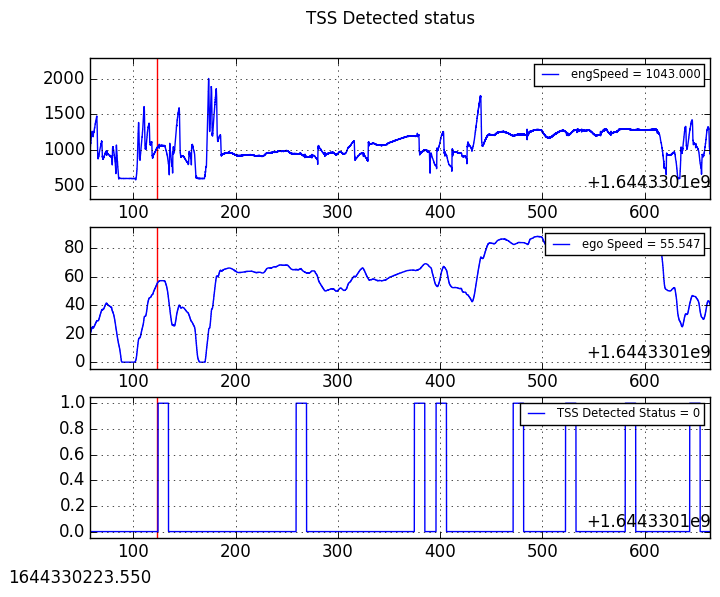

In [98]:
PlotTSSDetection.copyContentToFile("PlotTSSDetection.png")
Image("PlotTSSDetection.png")